 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("../Starter_Code/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)

# Sorting file in ascending order
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("../Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sorting file in ascending order
algo_returns.sort_index(ascending=True, inplace=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sorting file in ascending order
sp500_history.sort_index(ascending = True, inplace=True)
sp500_history.dropna(inplace=True)
sp500_history

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace('$',"").astype("float")
sp500_history.sort_index(inplace=True)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()

In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace = True)
sp500_daily_returns

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_daily = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis = "columns", join = "inner")

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

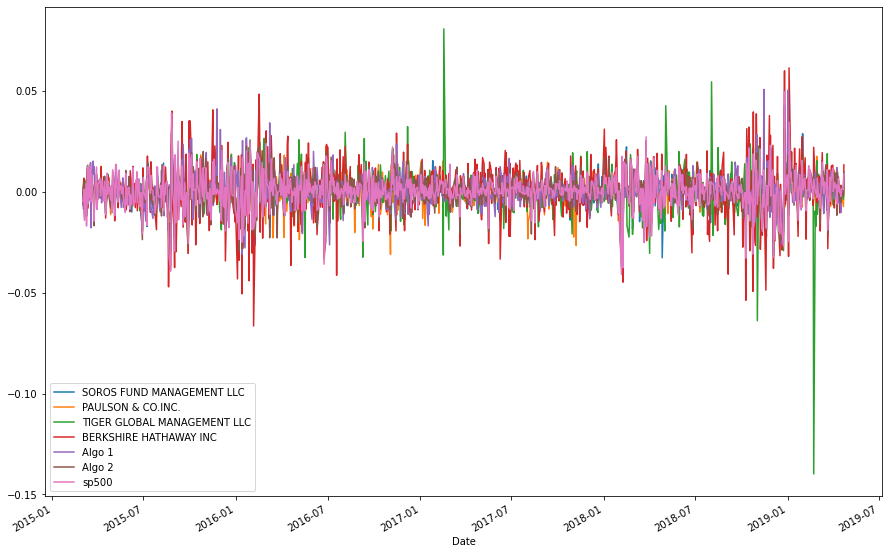

In [15]:
# Plot daily returns of all portfolios
df_daily.plot(figsize = (15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

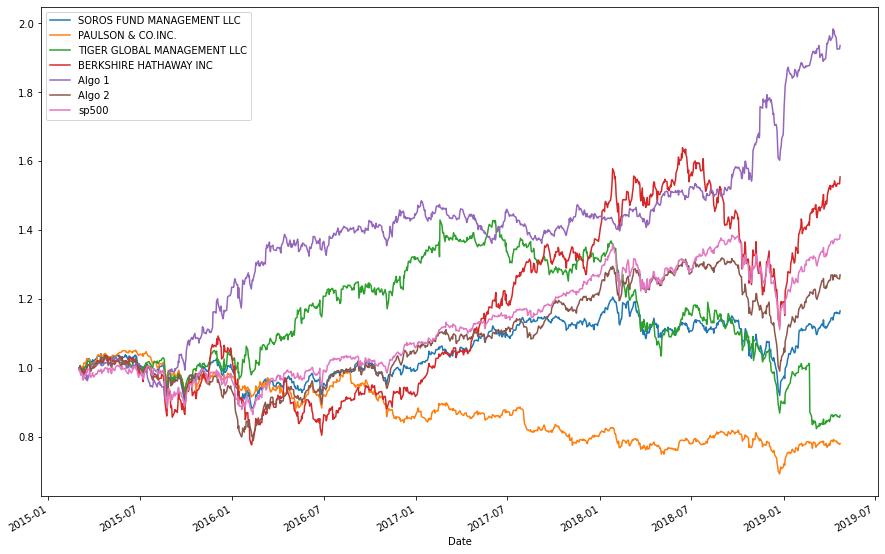

In [16]:
# Calculate cumulative returns of all portfolios
df_cuml = (1 + df_daily).cumprod()
# Plot cumulative returns
df_cuml.plot(figsize = (15,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

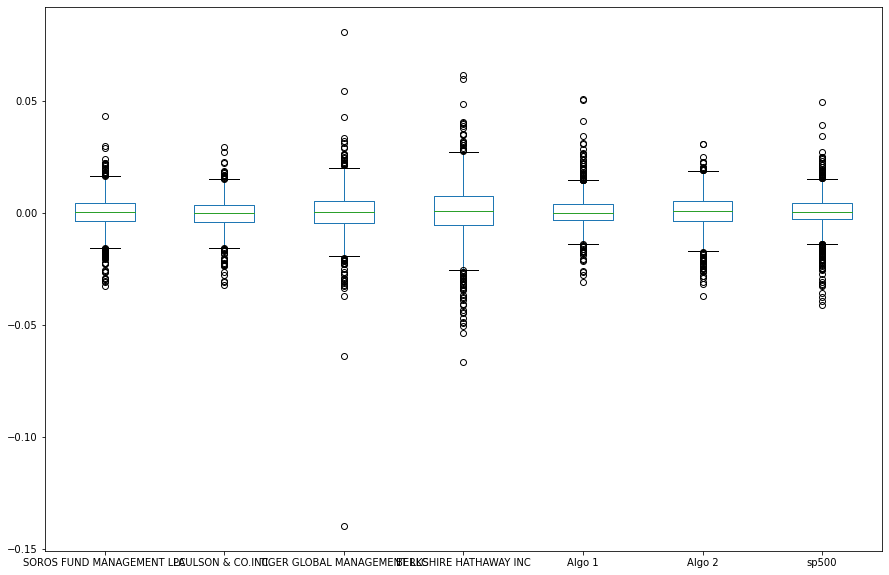

In [17]:
# Box plot to visually show risk
df_daily.plot(kind = "box", figsize = (15,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
df_daily_stdev = pd.DataFrame(df_daily.std()).rename(columns = {0:"Standard Deviation"})
df_daily_stdev 

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_stdev = pd.DataFrame(sp500_daily_returns.std()).rename(columns = {0:"Standard Deviation"})
sp500_daily_stdev
# Determine which portfolios are riskier than the S&P 500
higher_stdev = df_daily_stdev[df_daily_stdev["Standard Deviation"] > df_daily_stdev.loc["sp500", "Standard Deviation"]]
higher_stdev

,Standard Deviation
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_stdev = df_daily_stdev*np.sqrt(252)
df_annualized_stdev.columns = ["Annualized Standard Deviation"]
df_annualized_stdev_sorted = df_annualized_stdev.sort_values("Annualized Standard Deviation", ascending = False)
df_annualized_stdev_sorted

,Annualized Standard Deviation
BERKSHIRE HATHAWAY INC,0.205077
TIGER GLOBAL MANAGEMENT LLC,0.172936
sp500,0.135786
Algo 2,0.132430
SOROS FUND MANAGEMENT LLC,0.125335
Algo 1,0.120967
PAULSON & CO.INC.,0.111488


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

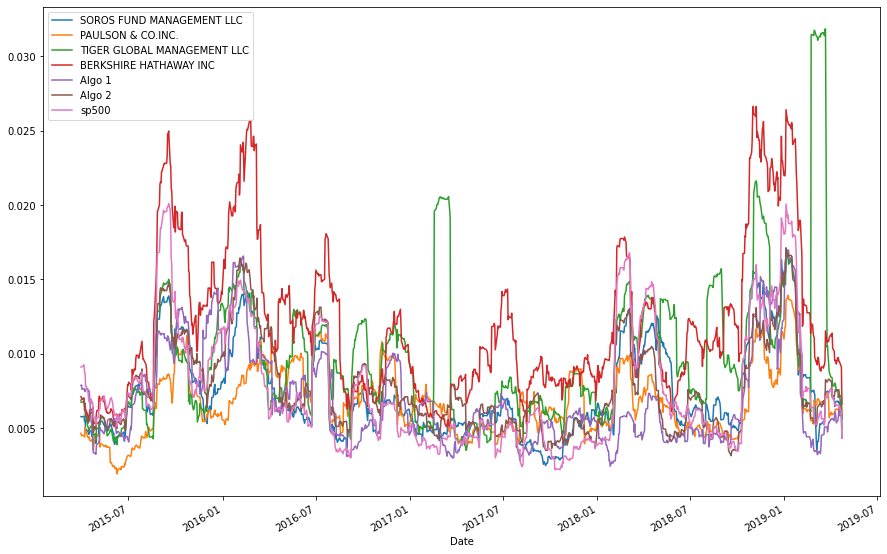

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling_21 = df_daily.rolling(window = 21).std()

# Plot the rolling standard deviation
sp500_rolling_21.plot(figsize = (15,10))

### Calculate and plot the correlation

<AxesSubplot:xlabel='sp500', ylabel='Algo 2'>

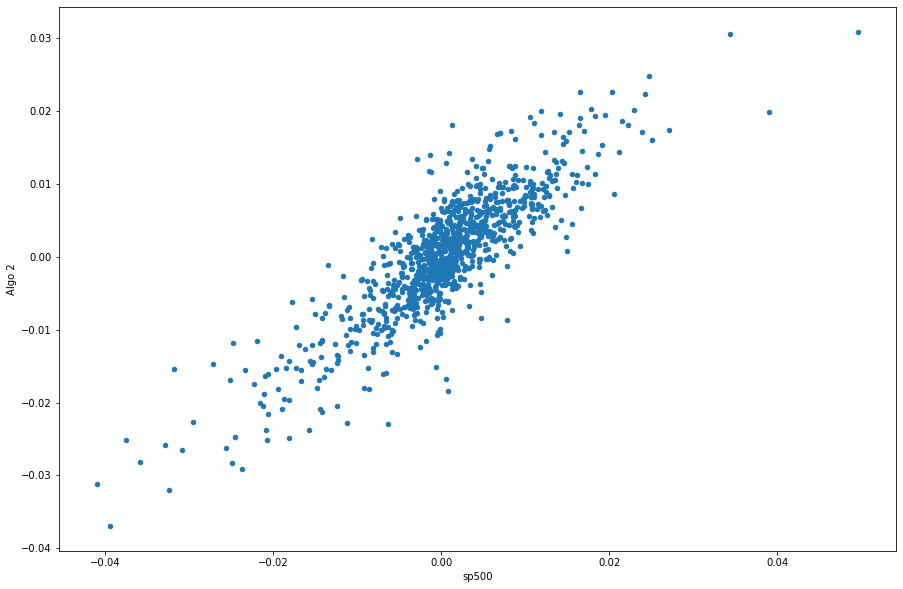

In [22]:
# Calculate the correlation
correlation_sp500 = pd.DataFrame(df_daily.corr()).loc[:,"sp500"]
correlation_sp500[correlation_sp500 == correlation_sp500[correlation_sp500 < 1].max()]

# Algo 2 has the closest corrleation to the sp500 per above line
# Display the correlation matrix
df_daily.plot(kind="scatter", y = "Algo 2", x = "sp500", figsize = (15,10))



### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

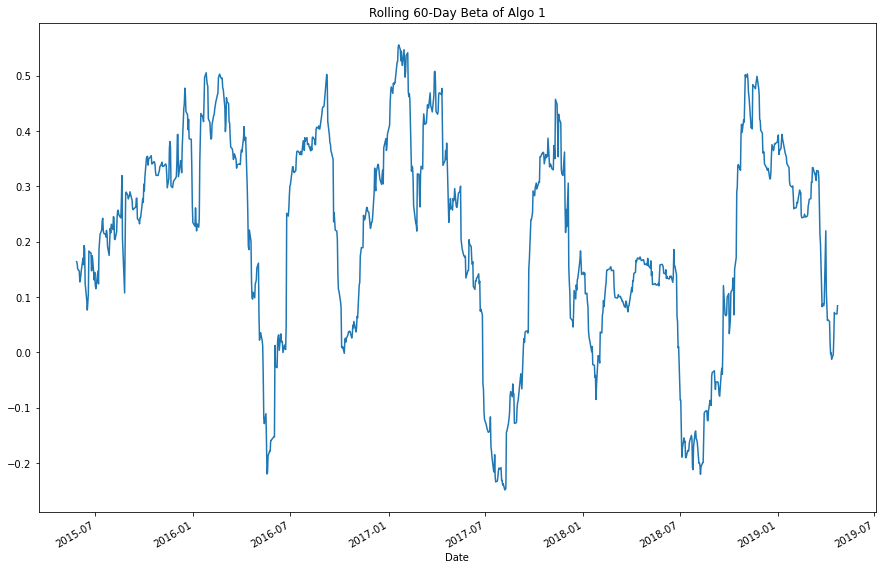

In [23]:
# Calculate covariance of a single portfolio
rolling_covariance = df_daily['Algo 1'].rolling(window = 60).cov(df_daily['sp500'])
# Calculate variance of S&P 500
rolling_variance = df_daily['sp500'].rolling(window = 60).var()
# Computing beta
rolling_beta = rolling_covariance/rolling_variance
# Plot beta trend
rolling_beta.plot(figsize = (15,10), title = 'Rolling 60-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

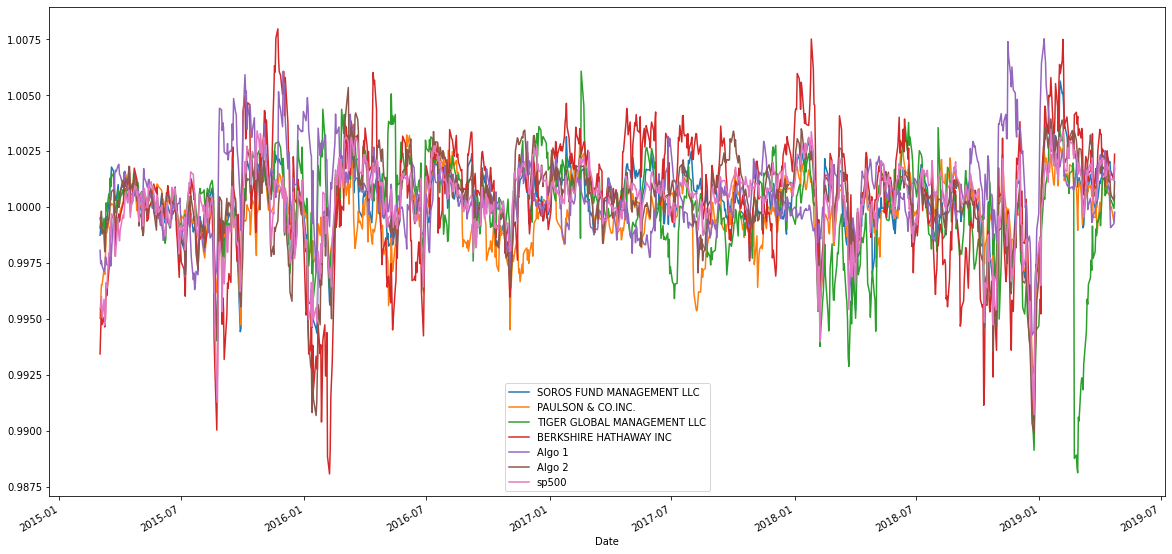

In [24]:
# Use `ewm` to calculate the rolling window

df_daily_ewm = df_daily.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = df_daily.mean() * 252 / (df_daily.std() * np.sqrt(252))
sharpe_ratios_sorted = sharpe_ratios.sort_values(ascending = False)
sharpe_ratios_sorted

Algo 1                         1.378648
sp500                          0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

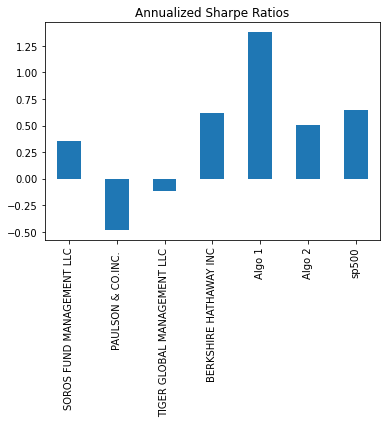

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Annualized Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [27]:
# Algo 1 performed better than the sp500 and the whale portfolios. 
# Algo 2 performed worse than the sp500 and Berkshire but did better than the rest of the whale portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
goog_historical_csv = Path("../Starter_Code/Resources/goog_historical.csv")
GOOG = pd.read_csv(goog_historical_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)

GOOG.rename(columns = {"NOCP": "GOOG"}, inplace = True)
GOOG.drop(columns = "Symbol", inplace = True)
GOOG


,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [29]:
# Reading data from 2nd stock
aapl_historical_csv = Path("../Starter_Code/Resources/aapl_historical.csv")
AAPL = pd.read_csv(aapl_historical_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)

AAPL.rename(columns = {"NOCP": "AAPL"}, inplace = True)
AAPL.drop(columns = "Symbol", inplace = True)
AAPL

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [30]:
# Reading data from 3rd stock
cost_historical_csv = Path("../Starter_Code/Resources/cost_historical.csv")
COST = pd.read_csv(cost_historical_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)

COST.rename(columns = {"NOCP": "COST"}, inplace = True)
COST.drop(columns = "Symbol", inplace = True)
COST

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [31]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat((GOOG, AAPL, COST), axis = 1, join = "inner")
combined_stocks.sort_index(ascending = True, inplace = True)
combined_stocks.dropna(inplace=True)
combined_stocks

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [32]:
# Reset Date index
combined_stocks.reset_index(drop = True)

,GOOG,AAPL,COST
0,1098.26,188.59,195.76
1,1100.20,188.15,195.88
2,1079.23,186.44,195.48
3,1081.77,188.18,198.71
4,1078.59,186.99,199.60
...,...,...,...
245,1185.40,211.75,244.62
246,1189.39,208.48,244.23
247,1174.10,202.86,240.18
248,1166.27,202.90,241.34


In [33]:
# Reorganize portfolio data by having a column per symbol
# Already coded per line above (Mike Ryu)

In [34]:
# Calculate daily returns
combined_stocks_daily_return = combined_stocks.pct_change()
# Drop NAs
combined_stocks_daily_return.dropna(inplace = True)
# Display sample data
combined_stocks_daily_return

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206
...,...,...,...
2019-05-03,0.019602,0.012431,0.007953
2019-05-06,0.003366,-0.015443,-0.001594
2019-05-07,-0.012855,-0.026957,-0.016583


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

portfolio = combined_stocks_daily_return.dot(weights)

# Drop Nulls
portfolio.dropna(inplace = True)

# Display sample data
portfolio


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio_returns = pd.concat((portfolio, df_daily), axis = 1, join = "inner")
combined_portfolio_returns.rename(columns = {0:"My_Portfolio"}, inplace = True)
combined_portfolio_returns

,My_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.001217,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio_returns.dropna(inplace = True)
combined_portfolio_returns

,My_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.001217,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
portfolio_stdev = pd.DataFrame(combined_portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_stdev

,std
My_Portfolio,0.013323
SOROS FUND MANAGEMENT LLC,0.009240
PAULSON & CO.INC.,0.007353
TIGER GLOBAL MANAGEMENT LLC,0.014648
BERKSHIRE HATHAWAY INC,0.015569
Algo 1,0.008423
Algo 2,0.008791
sp500,0.009578


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviations'}>

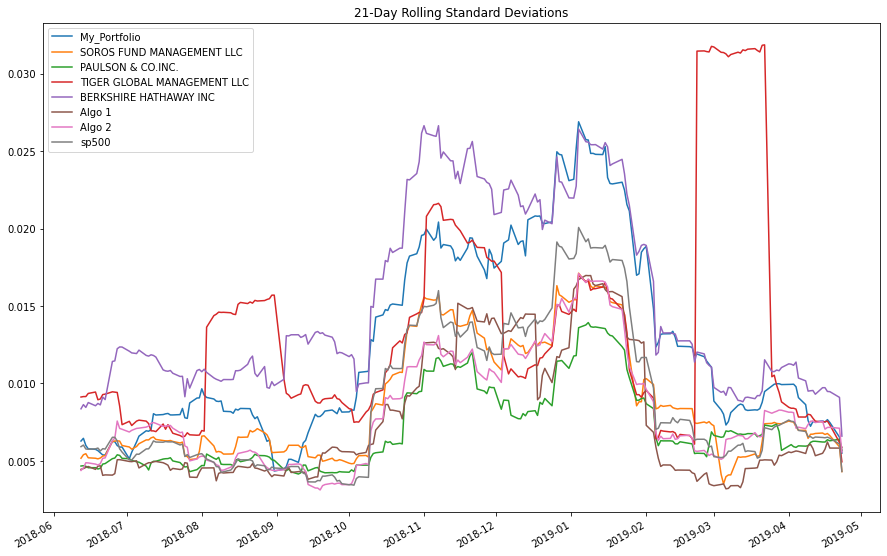

In [39]:
# Calculate rolling standard deviation 
combined_portfolio_returns_stdev = combined_portfolio_returns.rolling(window = 21).std()
# Plot rolling standard deviation
combined_portfolio_returns_stdev.plot(figsize = (15,10), title = "21-Day Rolling Standard Deviations")


### Calculate and plot the correlation

In [40]:
# Calculate and plot the correlation
correlation = combined_portfolio_returns.corr()
correlation

,My_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
My_Portfolio,1.000000,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.261471,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.739936,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
sp500,0.871875,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Portfolios'}>

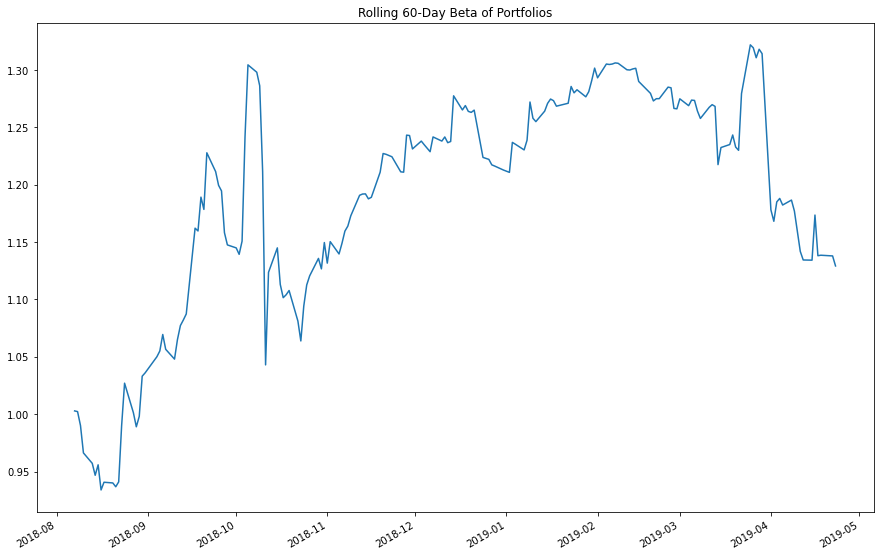

In [41]:
# Calculate and plot Beta
rolling_covariance = combined_portfolio_returns['My_Portfolio'].rolling(window = 60).cov(combined_portfolio_returns['sp500'])
rolling_variance = combined_portfolio_returns['sp500'].rolling(window = 60).var()
rolling_beta = rolling_covariance/rolling_variance 
rolling_beta.plot(figsize = (15,10), title = 'Rolling 60-Day Beta of Portfolios')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualzied Sharpe Ratios
annualized_sharpe_ratios = combined_portfolio_returns.mean() * 252 / (combined_portfolio_returns.std() * np.sqrt(252))
annualized_sharpe_ratios_sorted = annualized_sharpe_ratios.sort_values(ascending = False)
annualized_sharpe_ratios_sorted


Algo 1                         2.035665
My_Portfolio                   0.933123
sp500                          0.584820
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
BERKSHIRE HATHAWAY INC         0.159756
Algo 2                         0.080607
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

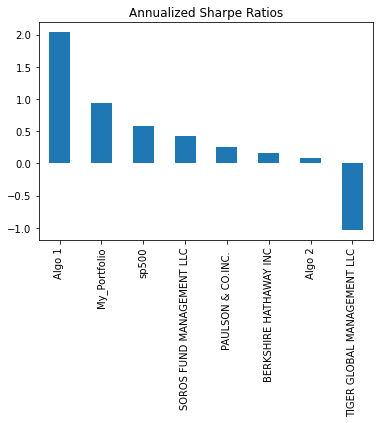

In [43]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios_sorted.plot(kind = "bar", title = "Annualized Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [44]:
# My portfolio is doing better than all other portfolios outside of Algo 1 whose shooting towards the moon!